In [1]:
# importing essencial packages

import pandas as pd
import numpy as np
from keys import key
import tweepy
import re


# # importing keys from keys.py file
# consumerKey = key["api_key"]
# consumerSecret = key["api_secret_key"]
# accessToken = key["access_token"]
# accessTokenSecret = key["access_token_secret"]
# bearer_token = key["bearer_token"]

# # Create the authentication object
# authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret) 
    
# # Set the access token and access token secret
# authenticate.set_access_token(accessToken, accessTokenSecret) 
    
# # Creating the API object while passing in auth information
# api = tweepy.API(authenticate, wait_on_rate_limit = True)

loadtweets = pd.read_csv("tweets.csv")
tweets = loadtweets["Text"]


# data in garbage way
tweets

0      Islamabad: 66 more children test positive for ...
1      @elonmusk Dear sir, \n              I am from ...
2      The provincial government notified a new set o...
3      @SaeedGhani1 Saeed bhai covid-19 on peak 5000 ...
4      Coronavirus India Live Updates: Vaccination dr...
                             ...                        
195    Sindh bans wedding ceremonies, reduces busines...
196    Sindh bans wedding ceremonies, reduces busines...
197    Sindh bans wedding ceremonies, reduces busines...
198    The new spending offensive comes soon after th...
199    Held ncoc meeting today with provincial chief ...
Name: Text, Length: 200, dtype: object

In [2]:
# creating a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RetWeets
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 text = re.sub('\n', '', text) # Removing newline \n
 text = re.sub(r"^\s+|\s+$", '', text) # Removing spaces from beggning and ending
 text = re.sub("\s\s+", '', text) # Removing spaces more than one

 return text


# Clean the tweets
cleanedTweets = tweets.apply(cleanTxt)

# Show the cleaned tweets
# cleanedTweets[15]
# creating datafram of tweets

# creating datafram of cleaned tweets
df = pd.DataFrame(cleanedTweets)
df

,Text
0,Islamabad: 66 more children test positive for ...
1,"Dear sir,I am from Pakistan and suffering from..."
2,The provincial government notified a new set o...
3,1 Saeed bhai covid-19 on peak 5000 cases recor...
4,Coronavirus India Live Updates: Vaccination dr...
...,...
195,"Sindh bans wedding ceremonies, reduces busines..."
196,"Sindh bans wedding ceremonies, reduces busines..."
197,"Sindh bans wedding ceremonies, reduces busines..."
198,The new spending offensive comes soon after th...


In [3]:
from textblob import TextBlob

# Creating a function to get the polarity positive neutral and negative range [-1.0, 1.0]
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity
   
# checking polarity
df['Polarity'] = df['Text'].apply(getPolarity)

df

,Text,Polarity
0,Islamabad: 66 more children test positive for ...,0.409091
1,"Dear sir,I am from Pakistan and suffering from...",-0.097222
2,The provincial government notified a new set o...,0.044949
3,1 Saeed bhai covid-19 on peak 5000 cases recor...,0.022222
4,Coronavirus India Live Updates: Vaccination dr...,0.136364
...,...,...
195,"Sindh bans wedding ceremonies, reduces busines...",0.500000
196,"Sindh bans wedding ceremonies, reduces busines...",0.500000
197,"Sindh bans wedding ceremonies, reduces busines...",0.500000
198,The new spending offensive comes soon after th...,0.234091


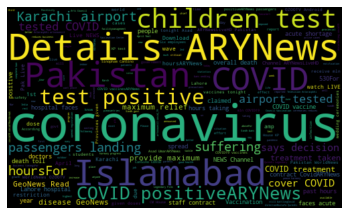

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# word cloud visualization it visulize most frequently used word in text
allWords = ' '.join([twts for twts in df['Text']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)

# wordcloud
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [5]:
# Creating a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

# pass label to polarity
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Text,Polarity,Analysis
0,Islamabad: 66 more children test positive for ...,0.409091,Positive
1,"Dear sir,I am from Pakistan and suffering from...",-0.097222,Negative
2,The provincial government notified a new set o...,0.044949,Positive
3,1 Saeed bhai covid-19 on peak 5000 cases recor...,0.022222,Positive
4,Coronavirus India Live Updates: Vaccination dr...,0.136364,Positive
...,...,...,...
195,"Sindh bans wedding ceremonies, reduces busines...",0.500000,Positive
196,"Sindh bans wedding ceremonies, reduces busines...",0.500000,Positive
197,"Sindh bans wedding ceremonies, reduces busines...",0.500000,Positive
198,The new spending offensive comes soon after th...,0.234091,Positive


In [6]:
# Printing positive tweets first

print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['Text'][i])
    print()
    j= j+1

Printing positive tweets:

1) Islamabad: 66 more children test positive for coronavirus in 24 hoursFor More Details: ARYNews

2) The provincial government notified a new set of restrictions and standard operating procedures (SOPs) for commercial, business and social activities, imposing a complete ban on indoor and outdoor marriage functions with effect from April 6 in view of the recent surge in Covid-19

3) 1 Saeed bhai covid-19 on peak 5000 cases record yesterday i would to request youbpls shut down all schools and colleges atleast 15 days. Are we waiting for any disaster God forbid i know you are much concern regarding students of Karachi and sindh stay blessed.

4) Coronavirus India Live Updates: Vaccination drive on all days of April, including holidaysviaofficialncoc ncocpakistan coronavaccine vaccination india pakistan islamabad Things to learn from neighbors.

5) . says decision to cover COVID-19 treatment taken to provide maximum relief to those suffering from the disease.Geo

In [7]:
# Print the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Text']
ptweets

print(round( (ptweets.shape[0] / df.shape[0]) * 100 , 1),"%")

60.0 %


In [8]:
# Print the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Text']
ntweets

print(round( (ntweets.shape[0] / df.shape[0]) * 100, 1),"%")

8.0 %


In [9]:
# Show the value counts
df['Analysis'].value_counts()

Positive    120
Neutral      64
Negative     16
Name: Analysis, dtype: int64

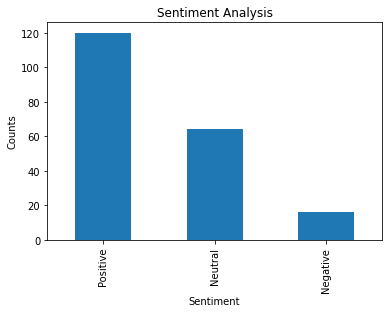

In [10]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()